# Alzheimer's Disease: A Complex Disorder

## Introduction

Alzheimer’s disease (AD) is a progressive neurodegenerative disorder that primarily affects memory and cognitive function. This analysis explores potential risk factors and patterns associated with Alzheimer's disease diagnosis using a dataset of 2,149 patients. The dataset includes demographic information, lifestyle habits, medical history, cognitive assessments, and behavioral symptoms.

**Objectives of the Analysis**
1. Data Preprocessing
- Convert numerical categorical variables (e.g., Gender, Ethnicity, Smoking) into readable labels.
- Identify missing values and handle inconsistencies.

2. Exploratory Data Analysis (EDA)
- Examine the distribution of key features such as age, MMSE scores, and diagnosis rates.
- Visualize correlations between cognitive function, lifestyle, and chronic diseases.

3. Risk Factor Assessment
- Compare groups based on AD diagnosis to identify statistically significant differences in risk factors.
- Analyze the impact of hypertension, diabetes, smoking, and lifestyle habits on cognitive decline.

4. Hypothesis Testing
- Perform t-tests and chi-square tests to determine which factors are significantly associated with AD.
- Perform ANOVA tests on key variables to examine differences across AD diagnosis groups. 

This analysis uncovers patterns and relationships in the dataset, providing insights into the potential predictors of Alzheimer’s disease and helping guide further research and intervention strategies. 


### Data Source
The data used in this project was collected and developed by [Rabie El Kharoua](https://www.kaggle.com/rabieelkharoua) as part of the [Alzheimer's Disease Dataset](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset/data) on Kaggle. It is synthetic and **for educational purposes only.** All data analyses and visualizations were performed using Python in JupyterLab Desktop. 

### Import Libraries

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind, chi2_contingency

## Load the Data and Understand its Structure

In [7]:
df = pd.read_csv('alzheimers_disease_data.csv')
df.head().T

,0,1,2,3,4
PatientID,4751,4752,4753,4754,4755
Age,73,89,73,74,89
Gender,0,0,0,1,0
Ethnicity,0,0,3,0,0
EducationLevel,2,0,1,1,0
BMI,22.927749,26.827681,17.795882,33.800817,20.716974
Smoking,0,0,0,1,0
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498


In [8]:
# Understanding the Data Structure
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                  

**Summary of Initial Data Exploration**
- The dataset contains 2,149 total observations.
- There are no missing or null values in the dataset.
- The dataset contains categorical data inputted as numerical data.
- The dataset uses cognitive and behavioral measures to assess cognitive decline. 

### Summary Statistics

In [11]:
print("\nSummary Statistics:")
df.describe().T


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [12]:
sum(df.duplicated())

0

In [13]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
Difficu

**Key Findings:**

There are no missing or duplicated values in the dataset. 

Summary Statistics:
- Age: Ranges from 60 to 90 years (mean 74.9).
- BMI: Varies between 15.0 to 39.99 (mean ~27.65).

Lifestyle Factors:
- Smoking: Binary (0 or 1) with 28.85% smokers.
- Alcohol Consumption: Mean ~10, max ~19.99.

Cognitive & Behavioral Symptoms:
- MMSE (Cognitive Score): Scored from 0 to 30. 
- MemoryComplaints, Confusion, Disorientation: Binary (0 or 1), indicating absence/presence of symptoms, respectively.
- Diagnosis: Binary (0 or 1), 35.36% of patients have Alzheimer’s.

### Data Cleaning
I began by converting numerical data in descriptive columns to categorical data.  

In [16]:
# Define categorical mappings
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', "Bachelor's Degree", 'Graduate Degree'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes'],
    'Diagnosis': ['No', 'Yes']
}
# Convert numerical values to categorical labels in a simplified way
df[list(custom_labels.keys())] = df[list(custom_labels.keys())].apply(lambda col: col.map(lambda x: custom_labels[col.name][int(x)] if pd.notnull(x) else None))

# Display the first few rows to verify conversion
print(df.head())

   PatientID  Age  Gender  Ethnicity     EducationLevel        BMI Smoking  \
0       4751   73    Male  Caucasian  Bachelor's Degree  22.927749      No   
1       4752   89    Male  Caucasian               None  26.827681      No   
2       4753   73    Male      Other        High School  17.795882      No   
3       4754   74  Female  Caucasian        High School  33.800817     Yes   
4       4755   89    Male  Caucasian               None  20.716974      No   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                No   
1            4.542524          7.619885     0.518767  ...                No   
2           19.555085          7.844988     1.826335  ...                No   
3           12.209266          8.428001     7.435604  ...                No   
4           18.454356          6.310461     0.795498  ...                No   

  BehavioralProblems       ADL Confusion Disorientation 

Previous analyses have already shown no duplicate values in the data set. As such, I proceeded to exploratory data analysis.

## Exploratory Data Analysis

I started by plotting key distributions.

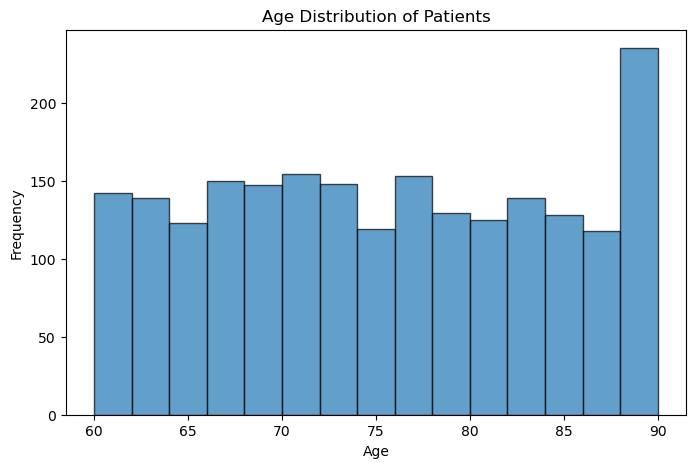

In [20]:
# Age Distribution of Patien
plt.figure(figsize=(8, 5))
plt.hist(df["Age"], bins=15, edgecolor="black", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Patients")
plt.show()

**MMSE:**

The Mini-Mental State Exam (MMSE) is a short screening tool for measuring cognitive impairment in clinical and research settings (Arevalo‐Rodriguez et al., 2015). The assessment consists of 11 questions, with a maximum score of 30. Studies, such as Yoelin & Saunders (2017), have suggested different cut-off scores as indications of cognitive impairment.

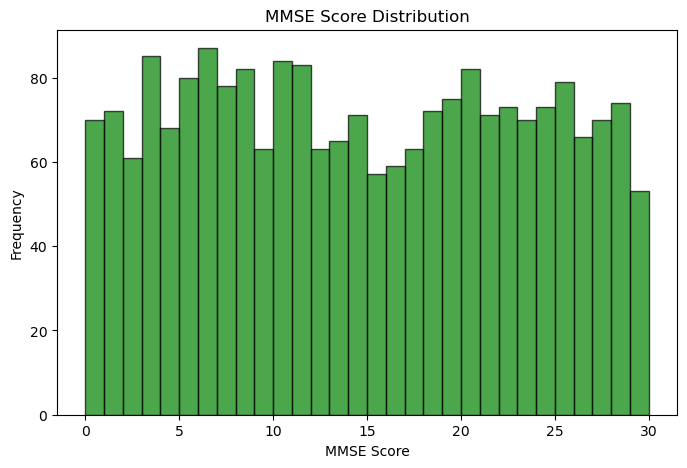

In [22]:
# Distribution of MMSE Scores
plt.figure(figsize=(8, 5))
plt.hist(df["MMSE"], bins=30, edgecolor="black", alpha=0.7, color="green")
plt.xlabel("MMSE Score")
plt.ylabel("Frequency")
plt.title("MMSE Score Distribution")
plt.show()

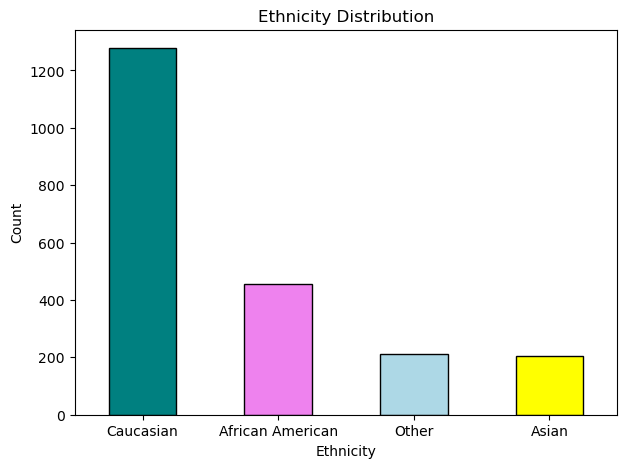

In [23]:
# Distribution of Ethnicity
plt.figure(figsize=(7, 5))
df["Ethnicity"].value_counts().plot(kind="bar", color=["teal", "violet", "lightblue", "yellow"], edgecolor="black")
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.title("Ethnicity Distribution")
plt.xticks(rotation=0)
plt.show()

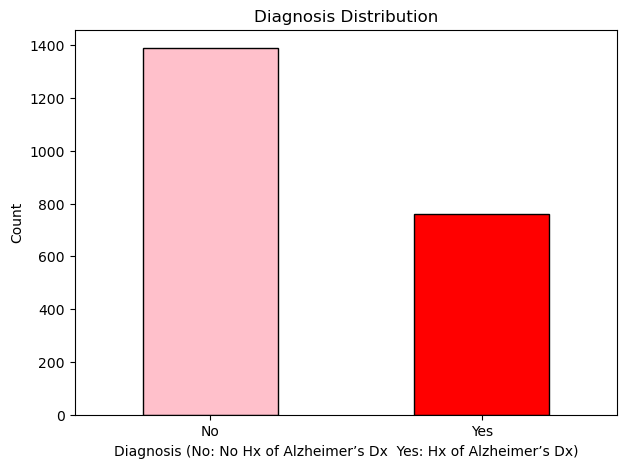

In [24]:
# Diagnosis Breakdown
plt.figure(figsize=(7, 5))
df["Diagnosis"].value_counts().plot(kind="bar", color=["pink", "red"], edgecolor="black")
plt.xlabel("Diagnosis (No: No Hx of Alzheimer’s Dx  Yes: Hx of Alzheimer’s Dx)")
plt.ylabel("Count")
plt.title("Diagnosis Distribution")
plt.xticks(rotation=0)
plt.show()

**Insights from Visualizations:**

Age Distribution:
- The majority of patients are between 65 and 85 years old.

Diagnosis Breakdown:
- Around 35% of patients are diagnosed with Alzheimer’s (label = Yes).
- The dataset is imbalanced, meaning more patients do not have Alzheimer’s (65%).

MMSE Score Distribution:
- MMSE scores are distributed across a wide range, from 0 to 30.
- A deeper analysis is needed to compare MMSE scores between patients diagnosed with AD and those without AD.

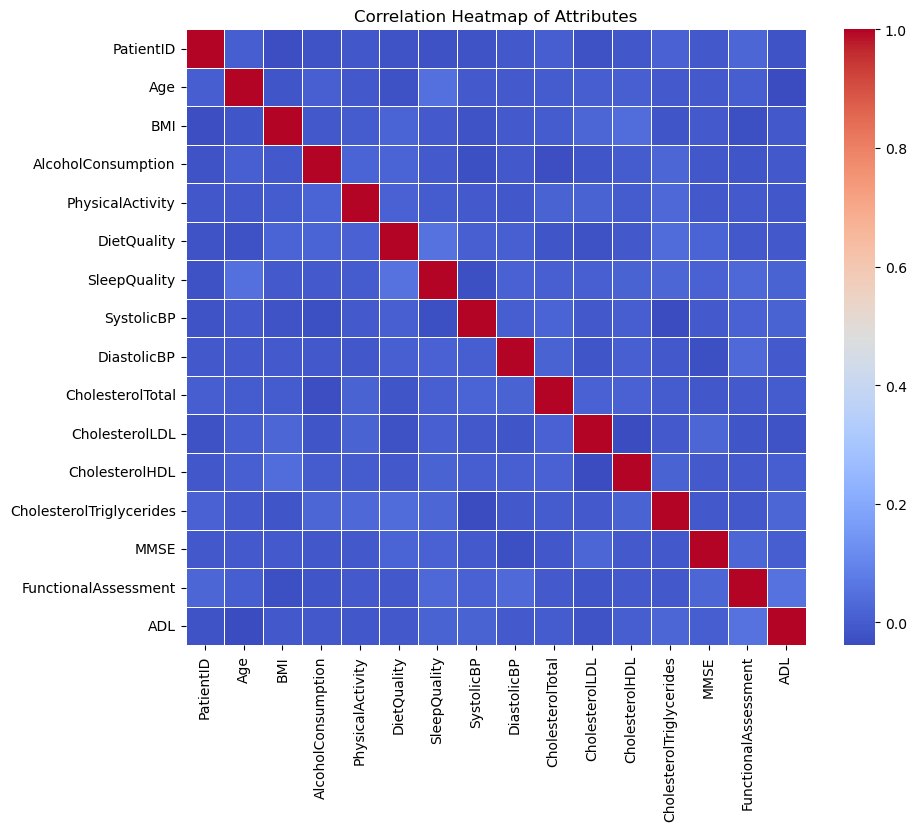

In [26]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Attributes")
plt.show()

### Pattern Identification

The MMSE is used as a screening tool for cognitive impairment. Therefore, it is expected that individuals diagnosed with AD would score lower in the assessment. This is tested using a boxplot. 

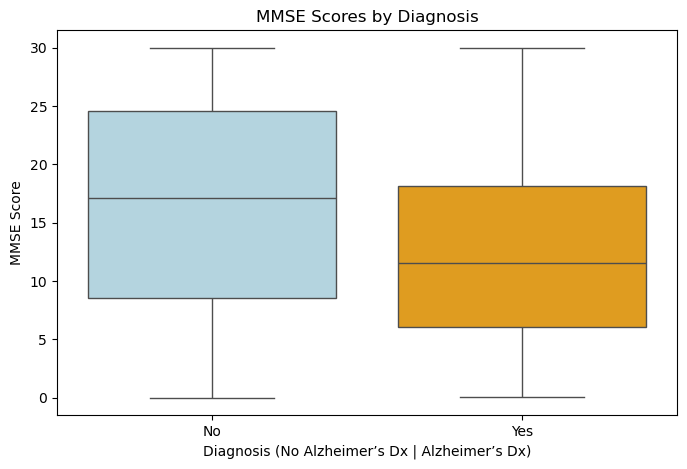

In [29]:
# Boxplot of MMSE Scores by Diagnosis
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x=df["Diagnosis"], y=df["MMSE"], hue=df["Diagnosis"], palette=["lightblue", "orange"])
plt.xlabel("Diagnosis (No Alzheimer’s Dx | Alzheimer’s Dx)")
plt.ylabel("MMSE Score")
plt.title("MMSE Scores by Diagnosis")
plt.show()

**Insights from MMSE Score vs. Diagnosis:**

As expected, patients diagnosed with AD have significantly lower MMSE scores compared to those without AD. This aligns with expectations, as lower cognitive test scores indicate cognitive decline.


### Next Steps:

The next step would be to analyze the correlation between AD and BMI & Chronic Diseases, all known risk factors associated with the development of Alzheimer's disease.

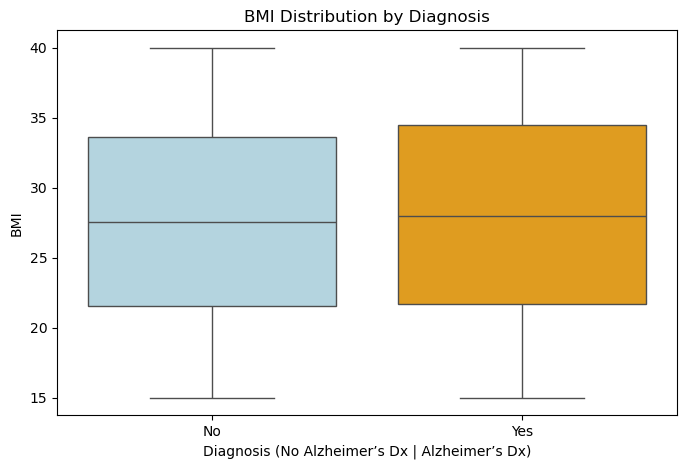

In [31]:
# Boxplot of BMI by Diagnosis
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x=df["Diagnosis"], y=df["BMI"], hue="Diagnosis", palette=["lightblue", "orange"])
plt.xlabel("Diagnosis (No Alzheimer’s Dx | Alzheimer’s Dx)")
plt.ylabel("BMI")
plt.title("BMI Distribution by Diagnosis")
plt.show()

**Insights from BMI vs. Diagnosis:**

BMI Distribution:

There was no significant difference in BMI between individuals diagnosed with AD and those without AD. This finding suggests BMI alone may not strongly predict the disease.

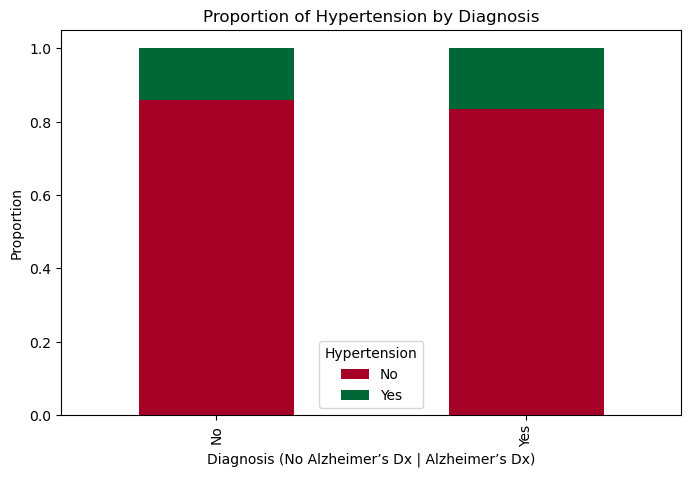

Hypertension    No  Yes
Diagnosis              
No            1195  194
Yes            634  126


In [33]:
# Create contingency table
contingency_table = pd.crosstab(df["Diagnosis"], df["Hypertension"])

# Normalize to get proportions
contingency_norm = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Plot stacked bar chart
contingency_norm.plot(kind="bar", stacked=True, figsize=(8,5), colormap="RdYlGn")

plt.xlabel("Diagnosis (No Alzheimer’s Dx | Alzheimer’s Dx)")
plt.ylabel("Proportion")
plt.title("Proportion of Hypertension by Diagnosis")
plt.legend(title="Hypertension", labels=["No", "Yes"])
plt.show()

# Display contingency table
print(contingency_table)


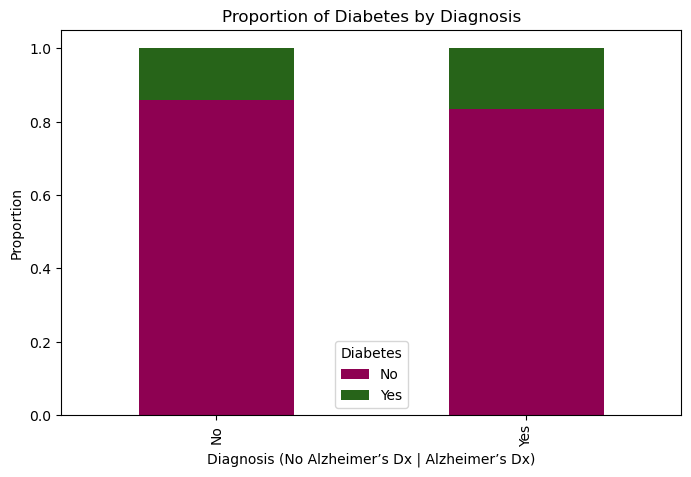

Diabetes     No  Yes
Diagnosis           
No         1168  221
Yes         657  103


In [34]:
# Normalize to get proportions
contingency_norm = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Plot stacked bar chart
contingency_norm.plot(kind="bar", stacked=True, figsize=(8,5), colormap="PiYG")

plt.xlabel("Diagnosis (No Alzheimer’s Dx | Alzheimer’s Dx)")
plt.ylabel("Proportion")
plt.title("Proportion of Diabetes by Diagnosis")
plt.legend(title="Diabetes", labels=["No", "Yes"])
plt.show()

# Contingency table showing Diabetes vs. Diagnosis.
print(pd.crosstab(df["Diagnosis"], df["Diabetes"]))

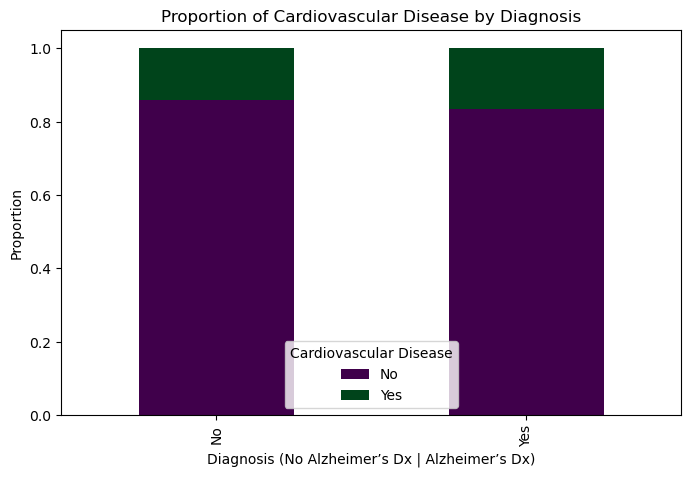

CardiovascularDisease    No  Yes
Diagnosis                       
No                     1200  189
Yes                     639  121


In [35]:
# Normalize to get proportions
contingency_norm = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Plot stacked bar chart
contingency_norm.plot(kind="bar", stacked=True, figsize=(8,5), colormap="PRGn")

plt.xlabel("Diagnosis (No Alzheimer’s Dx | Alzheimer’s Dx)")
plt.ylabel("Proportion")
plt.title("Proportion of Cardiovascular Disease by Diagnosis")
plt.legend(title="Cardiovascular Disease", labels=["No", "Yes"], loc="lower center")
plt.show()

# Contingency table showing Cardiovascular Disease vs. Diagnosis.
print(pd.crosstab(df["Diagnosis"], df["CardiovascularDisease"]))



**Insights from Chronic Diseases vs. Diagnosis:**

Hypertension:

- A higher proportion of hypertensive patients have been diagnosed with AD. This suggests a possible link between high blood pressure and cognitive decline.

Diabetes:

- Slightly more prevalent among diagnosed patients. Previous research suggests diabetes increases dementia risk, but further analysis is needed.

Cardiovascular Disease:

- Higher rates among diagnosed patients. This aligns with known research linking vascular health and brain function.

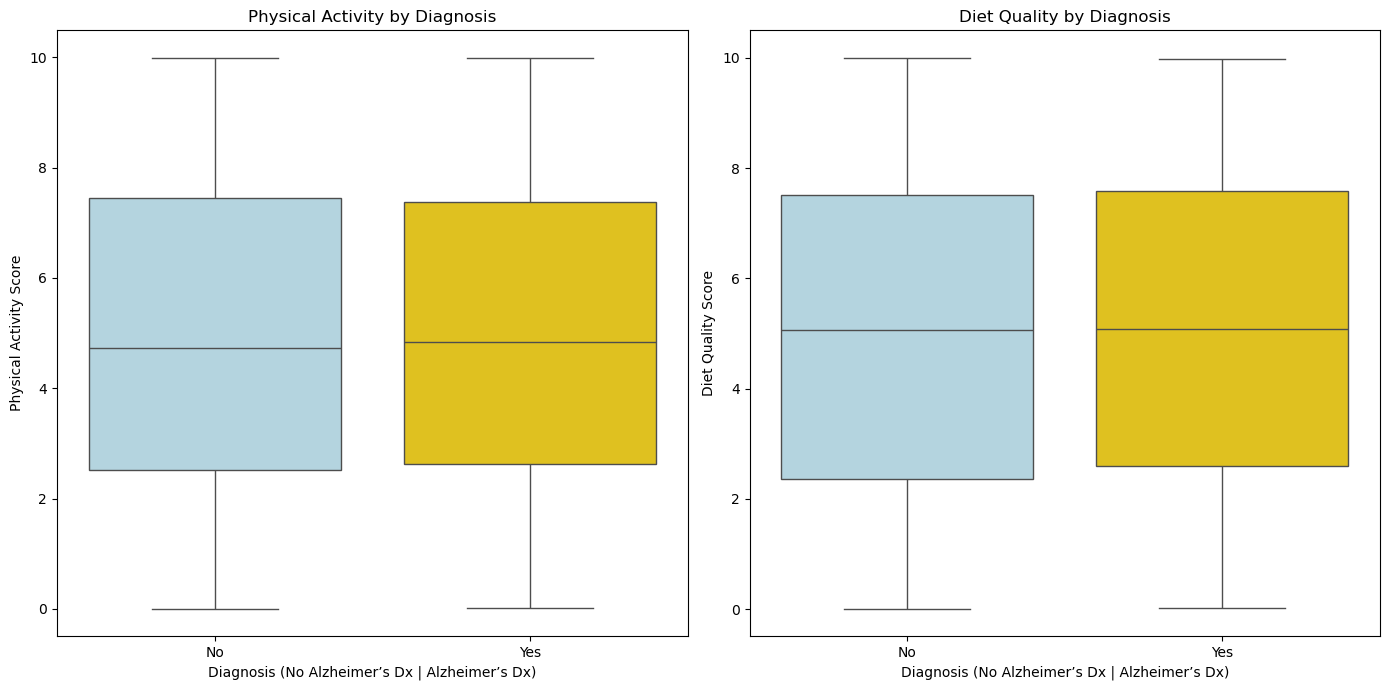

In [37]:
# I combined in boxplots for Physical Activity and Diet Quality into one cell:

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Physical Activity
sns.boxplot(data=df, x=df["Diagnosis"], y=df["PhysicalActivity"], 
            hue="Diagnosis", palette=["lightblue", "gold"], ax=axes[0])
axes[0].set_xlabel("Diagnosis (No Alzheimer’s Dx | Alzheimer’s Dx)")
axes[0].set_ylabel("Physical Activity Score")
axes[0].set_title("Physical Activity by Diagnosis")

# Diet Quality
sns.boxplot(data=df, x=df["Diagnosis"], y=df["DietQuality"], 
            hue="Diagnosis", palette=["lightblue", "gold"], ax=axes[1])
axes[1].set_xlabel("Diagnosis (No Alzheimer’s Dx | Alzheimer’s Dx)")
axes[1].set_ylabel("Diet Quality Score")
axes[1].set_title("Diet Quality by Diagnosis")

plt.tight_layout()
plt.show()

**Insights from Physical Activity and Diet Quality vs. Diagnosis:**

Physical Activity:

- Patients diagnosed with Alzheimer’s tend to have slightly lower physical activity levels.
- This supports the idea that an active lifestyle might help reduce the risk of cognitive decline.

Diet Quality:

- A slightly lower diet quality score was seen among those diagnosed with Alzheimer’s disease.
- A healthy diet may contribute to better cognitive health.

## Statistical Analysis

### Hypothesis Testing

**Hypotheses for Each Chi-Square Test**

1. Hypertension vs. Diagnosis
- Null Hypothesis (H₀): There is no significant association between hypertension and diagnosis. The presence of hypertension does not influence the diagnosis.
- Alternative Hypothesis (H₁): There is a significant association between hypertension and diagnosis. The presence of hypertension influences the diagnosis.

2. Diabetes vs. Diagnosis
- Null Hypothesis (H₀): There is no significant association between diabetes and diagnosis. Having diabetes does not affect the diagnosis.
- Alternative Hypothesis (H₁): There is a significant association between diabetes and diagnosis. Having diabetes influences the diagnosis.
  
3. Cardiovascular Disease vs. Diagnosis
- Null Hypothesis (H₀): There is no significant association between cardiovascular disease and diagnosis. Having cardiovascular disease does not impact the diagnosis.
- Alternative Hypothesis (H₁): There is a significant association between cardiovascular disease and diagnosis. Having cardiovascular disease influences the diagnosis.

4. Smoking vs. Diagnosis
- Null Hypothesis (H₀): There is no significant association between smoking and diagnosis. Smoking does not affect the diagnosis.
- Alternative Hypothesis (H₁): There is a significant association between smoking and diagnosis. Smoking influences the diagnosis.


In [40]:
# Chi-square tests for categorical variables
hypertension_chi2 = chi2_contingency(pd.crosstab(df["Diagnosis"], df["Hypertension"]))
diabetes_chi2 = chi2_contingency(pd.crosstab(df["Diagnosis"], df["Diabetes"]))
cardiovascular_chi2 = chi2_contingency(pd.crosstab(df["Diagnosis"], df["CardiovascularDisease"]))
smoking_chi2 = chi2_contingency(pd.crosstab(df["Diagnosis"], df["Smoking"]))

# Print Statistical Test Results
stat_results = {
    "Hypertension Chi-square p-value": hypertension_chi2[1],
    "Diabetes Chi-square p-value": diabetes_chi2[1],
    "Cardiovascular Disease Chi-square p-value": cardiovascular_chi2[1],
    "Smoking Chi-square p-value": smoking_chi2[1],
}

print("\nStatistical Test Results:")
for key, value in stat_results.items():
    print(f"{key}: {value:.5f}")


Statistical Test Results:
Hypertension Chi-square p-value: 0.11809
Diabetes Chi-square p-value: 0.16224
Cardiovascular Disease Chi-square p-value: 0.16284
Smoking Chi-square p-value: 0.86049


### Results Interpretation

Since the p-value (0.118) for the hypertension comparison is greater than the common significance level (0.05), we fail to reject the null hypothesis. This suggests that no significant association between hypertension and a diagnosis with AD exists in this dataset. 


Likewise, for both Diabetes and Cardiovascular Disease compared to Diagnosis, the p-values (0.162 and 0.163, respectively) are greater than 0.05. This also means we fail to reject the null hypothesis, indicating no significant association between these conditions and the diagnosis in this dataset.

Lastly, comparing smoking and diagnosis resulted in a p-value of 0.860, also greater than 0.05. As such, we once again fail to reject the null hypothesis. This finding also suggests that there is no significant association between Smoling and the diagnosis of AD in this dataset. 

### ANOVA Tests

I conducted ANOVA tests on several key numerocal variables, age, BMI, and cholesterol levels, to determine if they significantly differ between those diagnosed with AD and those not diagnosed with AD.

In [83]:
# Perform ANOVA tests for selected numerical variables based on Diagnosis groups
anova_results = {}
anova_vars = ["Age", "BMI", "CholesterolTotal", "CholesterolLDL", "CholesterolHDL", 
              "CholesterolTriglycerides", "PhysicalActivity", "DietQuality"]

# Loop through each variable and perform ANOVA
for var in anova_vars:
    groups = [df[var][df["Diagnosis"] == d] for d in df["Diagnosis"].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    anova_results[var] = {"F-Statistic": f_stat, 
                          "P-Value": round(p_value, 7)}

# Convert results to a DataFrame for better visualization
anova_df = pd.DataFrame.from_dict(anova_results, orient="index")

# Display results
display(anova_df)

,F-Statistic,P-Value
Age,0.064675,0.799279
BMI,1.490932,0.222206
CholesterolTotal,0.087793,0.767031
CholesterolLDL,2.197454,0.138386
CholesterolHDL,3.900444,0.048401
CholesterolTriglycerides,1.104156,0.293474
PhysicalActivity,0.075885,0.782980
DietQuality,0.155343,0.693520


### Results Interpretaion
The ANOVA test results indicate whether the mean values of different variables significantly differ among those diagnosed with AD versus those without AD.

1. Age: p = 0.799, which is greater than 0.05.
- This suggests that age distribution does not differ significantly among diagnosis groups.
- While Alzheimer's is age-related, this dataset does not show strong evidence that one group is significantly older than another.

2. BMI: p = 0.222, which is greater than 0.05.
- No substantial difference in Body Mass Index (BMI) among diagnosis groups.
- This implies that BMI may not be a distinguishing factor in Alzheimer’s diagnosis within this dataset.

3. Total Cholesterol: p = 0.767, which is greater than 0.05.
- No major variation in total cholesterol levels between different diagnosis groups.
- This finding contrasts with some studies that link high cholesterol to cognitive decline.

4. LDL Cholesterol: p = 0.138, which is greater than 0.05.
- LDL ("bad" cholesterol) levels do not significantly differ among diagnosis groups.

5. HDL Cholesterol: p = 0.048, which is less than 0.05.
- This suggests that HDL cholesterol ("good" cholesterol) levels vary significantly across diagnosis groups.

Follow-up analysis (e.g., post-hoc tests) is needed to determine which specific groups differ.

## Key Insights

- MMSE scores are the strongest differentiator between individuals diagnosed with AD and those without AD diagnosis.
- Although several studies, Edwards III et al. (2019), have shown the association between lifestyle factors (BMI, diet, physical activity) and chronic diseases, this dataset does not show strong statistical associations.
- HDL cholesterol levels are significantly different across groups. Further investigation (e.g., Tukey's post-hoc test) can determine which groups differ.
- Age, BMI, and LDL cholesterol are not significantly associated with Alzheimer's diagnosis in this dataset.
- Further analysis (e.g., logistic regression) is needed to determine potential risk factors and predictors of AD.


## References
- Arevalo‐Rodriguez, I., Smailagic, N., i Figuls, M. R., Ciapponi, A., Sanchez‐Perez, E., Giannakou, A., ... & Cullum, S. (2015). [Mini‐Mental State Examination (MMSE) for the detection of Alzheimer's disease and other dementias in people with mild cognitive impairment (MCI).](https://www.cochranelibrary.com/cdsr/doi/10.1002/14651858.CD010783.pub2/full) Cochrane database of systematic reviews, (3).
- Edwards III, G. A., Gamez, N., Escobedo Jr, G., Calderon, O., & Moreno-Gonzalez, I. (2019). [Modifiable risk factors for Alzheimer’s disease.](https://www.frontiersin.org/journals/aging-neuroscience/articles/10.3389/fnagi.2019.00146/full) Frontiers in aging neuroscience, 11, 146. 
- [Rabie El Kharoua](https://www.kaggle.com/rabieelkharoua) (2024). [Alzheimer's Disease Dataset](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset/data). DOI: [10.34740/KAGGLE/DSV/8668279]. Kaggle.
- Yoelin, A. B., & Saunders, N. W. (2017). [Score Disparity Between the MMSE and the SLUMS.](https://journals.sagepub.com/doi/full/10.1177/1533317517705222) American Journal of Alzheimer's Disease & Other Dementias®, 32(5), 282-288.